## 1. Detecting Outliers:

a. Boxplot

b. Z-score

c. Inter Quantile Range (IQR)

In [24]:
sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]

### a. Box plot

Text(0.5, 0, 'Sample')

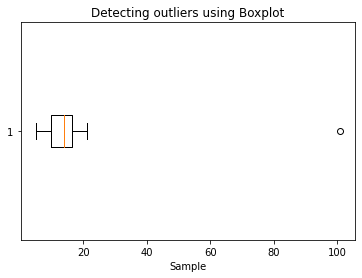

In [25]:
import matplotlib.pyplot as plt
plt.boxplot(sample,vert = False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel("Sample")

### b. Z - score

Steps:

a. loop through all the data points and compute the Z-score using the formula (Xi-mean)/std.

b. define a threshold value of 3 and mark the datapoints whose absolute value of Z-score is greater than the threshold as outliers.

In [26]:
import numpy as np

outliers = []

def detect_outliers_zscore(data):
    thre = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > thre:
            outliers.append(i)
    return outliers

sample_outliers = detect_outliers_zscore(sample)

print("Outliers from Z-score method:", sample_outliers)

Outliers from Z-score method: [101]


### c. IQR method

Criteria: data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers.


Step:

a. Sort the data in ascending order

b. Calculate the 1st and 3rd quartiles (Q1, Q3)

c. Compute IQR = Q3- Q1

d. Compute the bounds. Lower bound = (Q1 - 1.5 * IQR), Upper bound = (Q3 + 1.5 * IQR)

e. Loop through the values of the dataset and check for those who fall below and lower bound and above the upper bound

In [27]:
outliers = []

def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    for i in data:
        if i < lower_bound or i > upper_bound:
            outliers.append(i)
    return outliers

sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method:", sample_outliers)

Outliers from IQR method: [101]


## 2. Handling Outliers

a. Removing outliers

b. Quantile based flooring and capping

c. Mean/ Median imputation

### a. Removing Outliers

In [28]:
for i in sample_outliers:
    a = np.delete(sample, np.where(sample == i))
    
print(a)

# np.delete(arr, obj, axis = None)
# arr: input array
# obj: indicate of sub-arrays
# the axis along which to delte. axis = None is for flattened array

[ 15 101  18   7  13  16  11  21   5  15  10   9]


### b. Quantile based flooring and capping

In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.

In [29]:
tenth_percentile = np.percentile(sample,10)
ninetieth_percentile = np.percentile(sample,90)

# update sample for the first time: replace all values lower than 10%. new dataset to b
b = np.where(sample < tenth_percentile, tenth_percentile, sample)

# update the new dataset b. This time, replace all values in b > 90% of b to 90%
b = np.where(b > ninetieth_percentile, ninetieth_percentile, b )

print("New array: ", b)
# np.where(condition,x,y)
# returns elements chosen from x or y depending on condition

New array:  [15.  20.7 18.   7.2 13.  16.  11.  20.7  7.2 15.  10.   9. ]


### c. Mean / Median Imputation
As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.

In [47]:
median = np.median(sample)

# MUST convert the list into np.array. Or we will not detect the outliers in the loop
sample_outliers = np.array(sample_outliers)

for i in sample_outliers:
    c = np.where( sample == i, median, sample)
    
print(c)

[15. 14. 18.  7. 13. 16. 11. 21.  5. 15. 10.  9.]


Text(0.5, 0, 'Sample')

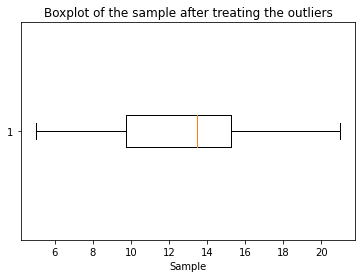

In [48]:
plt.boxplot(c, vert = False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")